<a href="https://colab.research.google.com/github/kienprojects/Machine-Learning-course/blob/main/Homework_Decision_tree_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bài tập về nhà Decision Tree, Random Forest


- Thực hiện các yêu cầu dưới đây với tập dữ liệu Australian credit
- Down dữ liệu tại đường link dưới đây và đặt vào folder  *'/data'*

  https://archive.ics.uci.edu/ml/datasets/Statlog+(Australian+Credit+Approval)
    

# Các bước làm

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Set random state
random_state = 42


## Tìm hiểu dữ liệu

In [4]:
'''
- Tìm hiểu cấu trúc data tại trang web UCI
- Down các files, đặt trong folder data/
- Chú ý:
    - Đọc mô tả dữ liệu trong file 'australian.doc'
    - Kiểm tra DecisionTree/RandomForest của Sklearn có hỗ trợ với kiểu dữ liệu được cung cấp không
'''
# Load the data
data_path = '/content/drive/MyDrive/VINBIGDATA/MachineLearning/00_Assignment/04_Decision_Tree/australian.dat'
data = pd.read_csv(data_path, sep=' ', header=None)

# Split features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

##  Decision Tree

###  Khảo sát với các giá trị khác nhau của max_depth

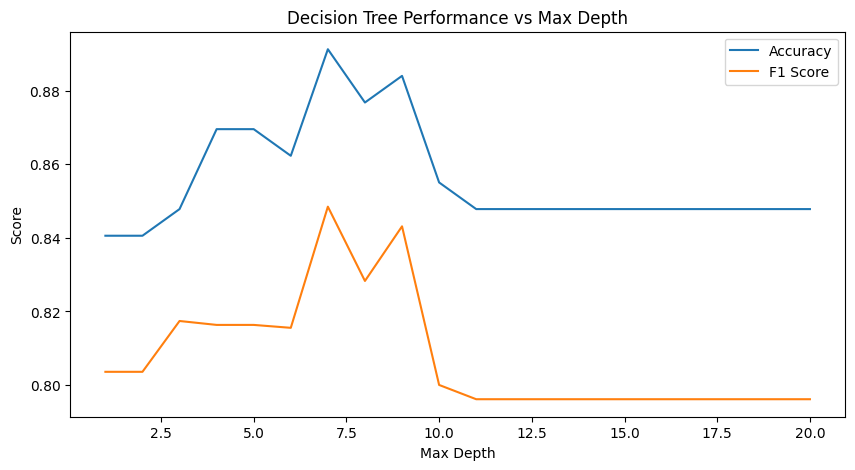

In [5]:
# code
# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, f1

# Khảo sát với các giá trị khác nhau của max_depth
max_depths = range(1, 21)
accuracies = []
f1_scores = []

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=random_state)
    accuracy, f1 = evaluate_model(dt, X_train, X_test, y_train, y_test)
    accuracies.append(accuracy)
    f1_scores.append(f1)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(max_depths, accuracies, label='Accuracy')
plt.plot(max_depths, f1_scores, label='F1 Score')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Decision Tree Performance vs Max Depth')
plt.legend()
plt.show()

###  Parameter tuning    

In [6]:
# code
# Parameter tuning for Decision Tree
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=random_state)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

# Evaluate the best model
best_dt = grid_search.best_estimator_
accuracy, f1 = evaluate_model(best_dt, X_train, X_test, y_train, y_test)
print(f"Best Decision Tree - Test Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best F1 score: 0.8372552659209042
Best Decision Tree - Test Accuracy: 0.8623, F1 Score: 0.8041


## Random Forest

### Khảo sát với các giá trị khác nhau của num_trees

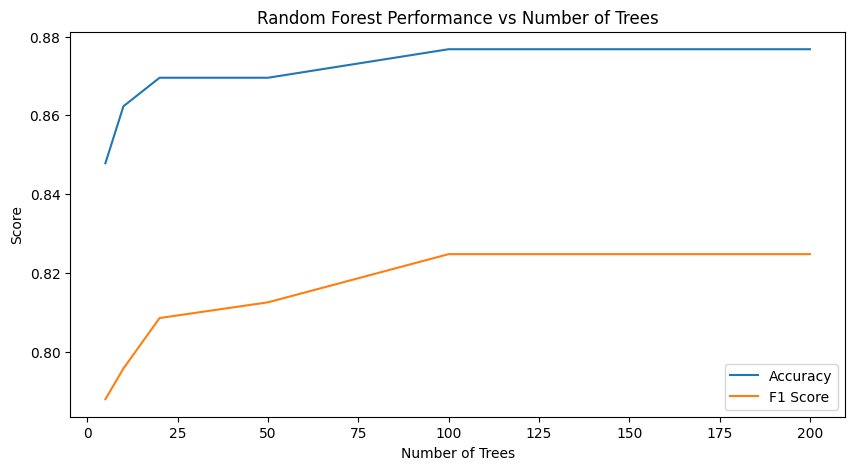

In [7]:
# code
# Khảo sát với các giá trị khác nhau của num_trees
num_trees = [5, 10, 20, 50, 100, 200]
rf_accuracies = []
rf_f1_scores = []

for n_estimators in num_trees:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    accuracy, f1 = evaluate_model(rf, X_train, X_test, y_train, y_test)
    rf_accuracies.append(accuracy)
    rf_f1_scores.append(f1)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(num_trees, rf_accuracies, label='Accuracy')
plt.plot(num_trees, rf_f1_scores, label='F1 Score')
plt.xlabel('Number of Trees')
plt.ylabel('Score')
plt.title('Random Forest Performance vs Number of Trees')
plt.legend()
plt.show()

### Parameter tuning

In [8]:
# code
# Parameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=random_state)
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='f1')
rf_grid_search.fit(X_train, y_train)

print("Best parameters:", rf_grid_search.best_params_)
print("Best F1 score:", rf_grid_search.best_score_)

# Evaluate the best model
best_rf = rf_grid_search.best_estimator_
accuracy, f1 = evaluate_model(best_rf, X_train, X_test, y_train, y_test)
print(f"Best Random Forest - Test Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best F1 score: 0.8715760297812671
Best Random Forest - Test Accuracy: 0.8768, F1 Score: 0.8247
